In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.multiclass import type_of_target

In [23]:
# Load dataset
data = pd.read_csv('heart_disease_dataset.csv')

# Check unique values in the 'Heart Disease' column
print(data['Heart Disease'].unique())
y=data['Heart Disease']
data=data.drop(['Heart Disease'],axis=1)


[1 0]


In [24]:
# inspect the data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1000 non-null   int64 
 1   Age                      1000 non-null   int64 
 2   Gender                   1000 non-null   object
 3   Cholesterol              1000 non-null   int64 
 4   Blood Pressure           1000 non-null   int64 
 5   Heart Rate               1000 non-null   int64 
 6   Smoking                  1000 non-null   object
 7   Alcohol Intake           660 non-null    object
 8   Exercise Hours           1000 non-null   int64 
 9   Family History           1000 non-null   object
 10  Diabetes                 1000 non-null   object
 11  Obesity                  1000 non-null   object
 12  Stress Level             1000 non-null   int64 
 13  Blood Sugar              1000 non-null   int64 
 14  Exercise Induced Angina  1000 non-null   

In [25]:
print(data.head())

   Unnamed: 0  Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0           0   75  Female          228             119          66  Current   
1           1   48    Male          204             165          62  Current   
2           2   53    Male          234              91          67    Never   
3           3   69  Female          192              90          72  Current   
4           4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  
0             8          119         

In [26]:
print(data.columns)

Index(['Unnamed: 0', 'Age', 'Gender', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Smoking', 'Alcohol Intake', 'Exercise Hours',
       'Family History', 'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type'],
      dtype='object')


In [27]:
print(data.describe())

        Unnamed: 0          Age  Cholesterol  Blood Pressure   Heart Rate  \
count  1000.000000  1000.000000  1000.000000       1000.0000  1000.000000   
mean    499.500000    52.293000   249.939000        135.2810    79.204000   
std     288.819436    15.727126    57.914673         26.3883    11.486092   
min       0.000000    25.000000   150.000000         90.0000    60.000000   
25%     249.750000    39.000000   200.000000        112.7500    70.000000   
50%     499.500000    52.000000   248.000000        136.0000    79.000000   
75%     749.250000    66.000000   299.000000        159.0000    89.000000   
max     999.000000    79.000000   349.000000        179.0000    99.000000   

       Exercise Hours  Stress Level  Blood Sugar  
count     1000.000000   1000.000000  1000.000000  
mean         4.529000      5.646000   134.941000  
std          2.934241      2.831024    36.699624  
min          0.000000      1.000000    70.000000  
25%          2.000000      3.000000   104.000000  


In [28]:
# Identify the missing value 
print(data.isnull().sum())

Unnamed: 0                   0
Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
dtype: int64


In [29]:
#for missing value
data.fillna(data.mean(numeric_only=True), inplace=True)

In [30]:
# remove duplicates
data.drop_duplicates(inplace=True)

In [31]:
data.columns = data.columns.str.strip()

In [32]:
data['Alcohol Intake'] = data['Alcohol Intake'].fillna("None")

In [33]:
data.head()

,Unnamed: 0,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
0,0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina
1,1,48,Male,204,165,62,Current,None,5,No,No,No,9,70,Yes,Typical Angina
2,2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina
3,3,69,Female,192,90,72,Current,None,4,No,Yes,No,7,107,Yes,Non-anginal Pain
4,4,62,Female,172,163,93,Never,None,6,No,Yes,No,2,183,Yes,Asymptomatic


In [34]:
# Print column names to verify
print("Columns in the dataset:", data.columns.tolist())

Columns in the dataset: ['Unnamed: 0', 'Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History', 'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar', 'Exercise Induced Angina', 'Chest Pain Type']


In [35]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)
 

Categorical columns: ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']


In [36]:
 # Create dummy variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Normalize Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
 

In [37]:
# Select numerical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['Unnamed: 0', 'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar', 'Gender_Male', 'Smoking_Former', 'Smoking_Never', 'Alcohol Intake_Moderate', 'Alcohol Intake_None', 'Family History_Yes', 'Diabetes_Yes', 'Obesity_Yes', 'Exercise Induced Angina_Yes', 'Chest Pain Type_Atypical Angina', 'Chest Pain Type_Non-anginal Pain', 'Chest Pain Type_Typical Angina']


In [38]:
# Apply Z-score normalization
data[numeric_cols] = data[numeric_cols].apply(lambda x: stats.zscore(x, nan_policy='omit'))
 

In [39]:
# Remove outliers
data = data[(np.abs(data[numeric_cols]) < 3).all(axis=1)]

In [40]:
set(y)

{0, 1}

In [41]:

 # Split Data into Training and Testing Set
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
print("Data preparation complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Data preparation complete.
X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


In [42]:
# Ensure y_train is a numpy array
y_train = np.array(y_train)


# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Verify the model's attributes
print("Classes:", model.classes_)
print("Number of classes:", model.n_classes_)

# Make predictions on the test set
y_pred = model.predict(X_test)

Classes: [0 1]
Number of classes: 2


In [44]:
# Ensure y_test is a numpy array
y_test = np.array(y_test)

# Check the type of y_test and y_pred
print("Type of y_test:", type_of_target(y_test))
print("Type of y_pred:", type_of_target(y_pred))

# If y_test is continuous, convert it to categorical
if type_of_target(y_test) == 'continuous':
    bins = np.linspace(min(y_test), max(y_test), 4)
    y_test_binned = np.digitize(y_test, bins) - 1  # Subtract 1 to make bins start from 0
    print("Type of y_test_binned:", type_of_target(y_test))
    print("Unique values in y_test_binned:", np.unique(y_test))
else:
    y_test_binned = y_test

# Calculate accuracy
accuracy = accuracy_score(y_test_binned, y_pred)

# Calculate precision
precision = precision_score(y_test_binned, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test_binned, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test_binned, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Type of y_test: binary
Type of y_pred: binary
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [45]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                             Feature  Importance
1                                Age    0.523922
2                        Cholesterol    0.240864
3                     Blood Pressure    0.034932
7                        Blood Sugar    0.034778
0                         Unnamed: 0    0.033511
4                         Heart Rate    0.029157
6                       Stress Level    0.021099
5                     Exercise Hours    0.019519
9                     Smoking_Former    0.007317
10                     Smoking_Never    0.006068
11           Alcohol Intake_Moderate    0.006057
15                       Obesity_Yes    0.005785
8                        Gender_Male    0.005578
18  Chest Pain Type_Non-anginal Pain    0.005143
13                Family History_Yes    0.004974
16       Exercise Induced Angina_Yes    0.004709
14                      Diabetes_Yes    0.004477
12               Alcohol Intake_None    0.004047
17   Chest Pain Type_Atypical Angina    0.004046
19    Chest Pain Typ

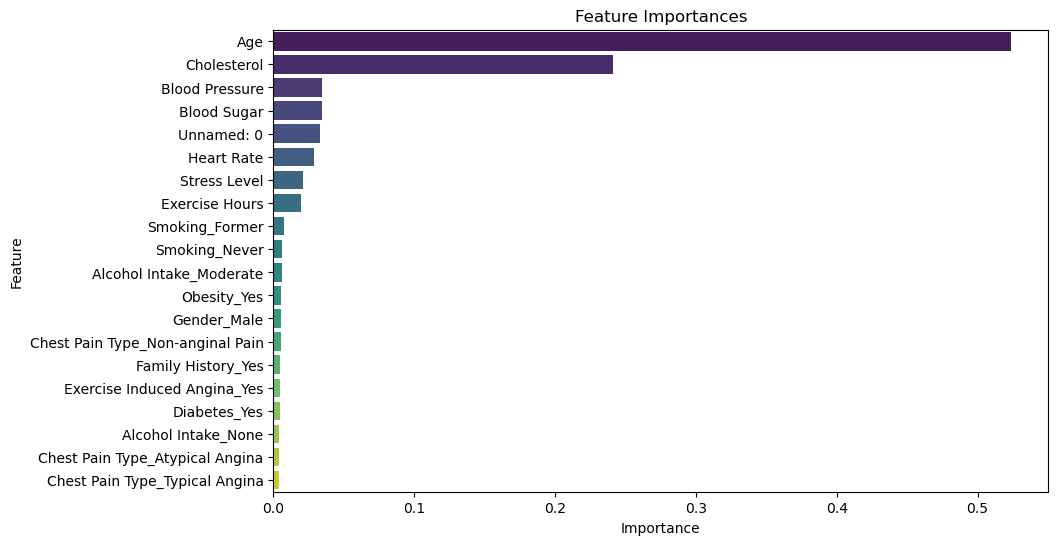

In [46]:
# Create the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
#In summary, Age and Cholesterol are the most influential features in our model, 
#while features like Chest Pain Type and Exercise Induced Angina have very little impact on the predictions.

In [48]:
set(y_train)

{0, 1}

In [49]:
# Train the linear regression model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report

model =KNeighborsClassifier(n_neighbors = 3) 
model.fit(X_train, y_train)



# Predict using the model
y_pred = model.predict(X_test)

 # Print first 10 predictions
print("Predictions",y_pred[:10])

# Create the confusion matrix
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Predictions [1 1 0 0 0 0 0 0 1 1]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       118
           1       0.68      0.62      0.65        82

    accuracy                           0.73       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.72      0.72       200



In [ ]:
#The model performs better in predicting class 0 than class 1.
#Overall accuracy is 73%, indicating that the model correctly predicts the class for 73% of the instances.
# The precision, recall, and F1-scores are slightly higher for class 0 compared to class 1, 
#suggesting the model is more reliable in identifying class 0.

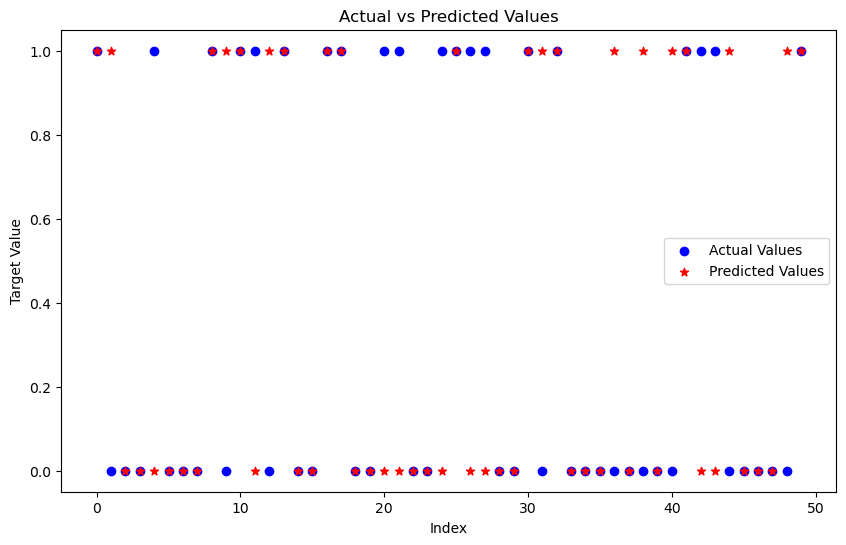

In [50]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], color='blue', label='Actual Values')
plt.scatter(range(50), y_pred[:50], color='red',marker='*', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


In [ ]:
#The plot shows that the model’s predictions are not consistently accurate. 
#There are discrepancies between the actual and predicted values, 
#suggesting that the model could be improved for better accuracy

In [52]:
import pickle
with open('model.pkl', 'wb') as mo:
    pickle.dump(model,mo)

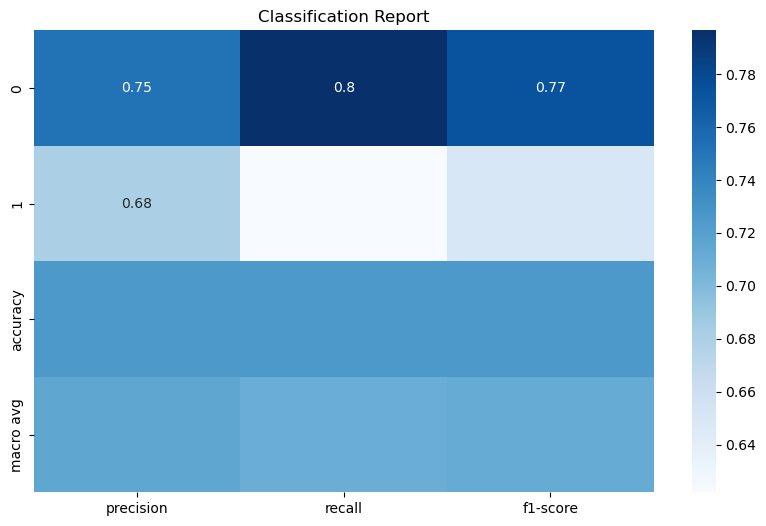

In [53]:
# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [ ]:
#Darker blue shades indicate higher scores, showing where the model performs well.
#This helps quickly identify strengths and areas for improvement in the model’s predictions.